In [604]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import norm
from scipy import stats

In [605]:
df = pd.read_csv("train.csv") #training data set
df1 = pd.read_csv("test.csv") #test data set

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [607]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

# Data Pre-processing

### Outliers
The [documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) on the Ames dataset indicates that there are outliers present in the training data. The owner of the data, **Dean De Cook** recommends to remove the outliers (3 of which are partial sales that most likely don't represent actual market values and 2 of them are simply very unusual sales).

With that, let's see where the outliers are and remove them!

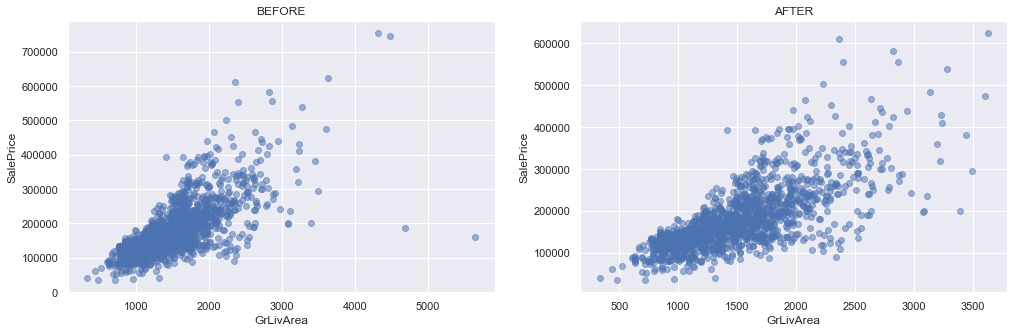

In [608]:
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
p = sns.regplot(x=df['GrLivArea'],y=df['SalePrice'],fit_reg=False,scatter_kws={'alpha':0.5}).set_title("BEFORE")

#After deleting outliers
plt.subplot(1,2,2)
df = df.drop(df[df['GrLivArea']>4000].index)
q = sns.regplot(x=df['GrLivArea'],y=df['SalePrice'],fit_reg=False,scatter_kws={'alpha':0.5}).set_title("AFTER")

### Analysing Response Variable: 'SalePrice:

Since SalePrice is our response variable, we'll perform a univariate and bivariate analysis on it

In [609]:
df['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

C:\Users\MatthiasL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


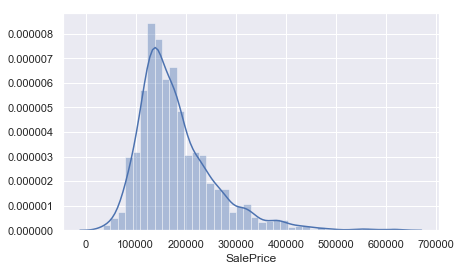

In [610]:
sns.distplot(df['SalePrice'])

Though we see that our data is skewed to the right, we do not attempt to transform our data. Though many of the other notebooks transform the SalePrice variable at this stage to meet the normality assumption, I will not transform the response variable until we have looked the at the distribution of the residuals later on

# Missing Data

### Concatenation of training and test set
We'll concatenate training and test set together while we clean the data and will split them again later on

In [611]:
#Looking at the dimensions of data for the purposes of concatenation
print('Dimensions of training data:', df.shape)
print('Dimensions of testing data:', df1.shape)

Dimensions of training data: (1456, 81)
Dimensions of testing data: (1459, 80)


Our testing set has one less column as compared to the training set because it does not have the response variable, 'SalePrice' in it. So, we'll drop and save the 'SalePrice' column in the training set so that both training and test set have the same dimensions.

In [612]:
y = df['SalePrice'] #Saving the response variable for later 
df_features = df.drop(['SalePrice'],axis=1) 
#df_features = df.set_index('Id') 
#df1_features = df1.set_index('Id')
df1_features=df1
cb = pd.concat([df_features,df1_features]).reset_index(drop=True)
print(df_features.shape)
print(df1_features.shape)

(1456, 80)
(1459, 80)


In [613]:
tot = cb.isnull().sum().sort_values(ascending=False)
pct = (cb.isnull().sum()/cb.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([tot,pct],axis=1,keys=['Total','Percent Missing'])
missing_data[missing_data['Total'] > 0]

,Total,Percent Missing
PoolQC,2907,99.725557
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageCond,159,5.454545
GarageQual,159,5.454545
GarageYrBlt,159,5.454545
GarageFinish,159,5.454545


* **PoolQC (Ordinal):**   
    *   Ex	Excellent
    *   Gd	Good
    *   TA	Average/Typical
    *   Fa	Fair
    *   NA	No Pool
   
The most probable reason for such a large number of missing value (~99.7%) is due to the fact that most houses do not have a pool. Let's first look for houses that has a 'PoolArea' but has no values for PoolQC and impute a value based on the 'OverallCond' of the house. Then, we'll fill in NA values for the rest of the house that doesn't have a 'PoolArea'. We can also use `combined['PoolQC'].unique()` to look at the type of rating present for 'PoolQC'


In [614]:
#We see that the overall condition of the houses are 6, 5, and 5 respectively
cb[(cb['PoolArea'] > 0) & (cb['PoolQC'].isnull())][['OverallCond','PoolArea','PoolQC']]

,OverallCond,PoolArea,PoolQC
2416,6,368,NaN
2499,5,444,NaN
2595,5,561,NaN


We see that the overall condition of the houses are 6, 5, and 5. As such we'll give it a rating of Gd = Good, Fa = Fair, and Fa = Fair respectively.

In [615]:
cb.loc[2416,'PoolQC'] = 'Gd'
cb.loc[2499,'PoolQC'] = 'Fa'
cb.loc[2595,'PoolQC'] = 'Fa'
#Filling the rest of the houses with no pool with 'None'
cb['PoolQC'] = cb["PoolQC"].fillna('None')

* **MiscFeature (Nominal):** (Miscellaneous feature not covered in other categories)
    * Elev  Elevator
    * Gar2	2nd Garage (if not described in garage section)
    * Othr	Other
    * Shed	Shed (over 100 SF)
    * TenC	Tennis Court
    * NA	None
    
We'll fill null values for those that doesn't have MiscFeatures

In [616]:
print(cb['MiscFeature'].value_counts(dropna=False))
cb['MiscFeature'] = cb['MiscFeature'].fillna('None')

NaN     2810
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64


* **Alley (Nominal):** Type of alley access to property
     *  Grvl	Gravel
     *  Pave	Paved
     *  NA 	No alley access
     
We'll assume that having no values in this columns mean that there are no alley access to the property

In [617]:
print(cb['Alley'].value_counts(dropna=False))
cb['Alley'] = cb['Alley'].fillna('None')

NaN     2717
Grvl     120
Pave      78
Name: Alley, dtype: int64


* **Fence (Ordinal):** Fence quality		
    *   GdPrv	Good Privacy
    *   MnPrv	Minimum Privacy
    *   GdWo	Good Wood
    *   MnWw	Minimum Wood/Wire
    *   NA	No Fence
    
`nan` means no fence in the documentation and we'll input that for the missing values

In [618]:
print(cb['Fence'].value_counts(dropna=False))
cb['Fence'] = cb['Fence'].fillna('None')
#cb['Fence'].value_counts()

NaN      2345
MnPrv     328
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64


* **FireplaceQu (Ordinal):** Fireplace quality

     *  Ex	Excellent - Exceptional Masonry Fireplace
     *  Gd	Good - Masonry Fireplace in main level
     *  TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
     *  Fa	Fair - Prefabricated Fireplace in basement
     *  Po	Poor - Ben Franklin Stove
     *  NA	No Fireplace
		

In [619]:
print(cb['FireplaceQu'].value_counts(dropna=False))
cb['FireplaceQu'] = cb['FireplaceQu'].fillna('None')

NaN    1420
Gd      742
TA      591
Fa       74
Po       46
Ex       42
Name: FireplaceQu, dtype: int64


* **Lot Frontage (Continuous):** Linear feet of street connected to property

It is reasonable to assume that the linear feet of street connected to the property should be roughly about the same as the properties around the neighbourhood. So, we'll fill in the missing values for these based on the median of the lot frontage of properties in that neighbourhood. But first, let's check to make sure there aren't any houses with null Neighbourhood values

In [620]:
cb['Neighborhood'].isnull().any() #All properties have a neighbourhood value!

False

In [621]:
#Imputing null values with the median per neighborhood
cb['LotFrontage'] = cb.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

**Garage**

Next, we'll explore Garage variables. There are a total of 7 variables related to garage. From above, we can see that `GarageCond`, `GarageQual`, `GarageYrBlt`, `GarageFinish` has 159 NAs, `GarageType` has 157 NAs and `GarageCars`, `GarageArea` both has 1 NA value

Let's first find the 2 observations that has `GarageType` but may potentially have null values for all the other `Garage` related variables. From the result below, it seems like the houses has a garage but 
are just missing some values. As such, we'll impute it using the mean and median values of the other
Garage in that neighborhood. For `GarageYrBlt`, we'll simply use the value from `YearBuilt` which is the original construction date of the house.

Now, we'll finish imputing the 157 NAs by assuming there are no garage.

In [622]:
cb[cb['GarageYrBlt'].isnull() & cb['GarageType'].notnull() ][['Id','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','GarageArea','GarageCars']]

,Id,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageArea,GarageCars
2122,2127,Detchd,NaN,NaN,NaN,NaN,360.0,1.0
2572,2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [623]:
cb.loc[2122, 'GarageFinish']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageFinish'].value_counts()[1].index[0] 
cb.loc[2122,'GarageYrBlt']=cb.loc[2122,'YearBuilt']
cb.loc[2122,'GarageQual']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageQual'].value_counts()[1].index[0]
cb.loc[2122,'GarageCond']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageCond'].value_counts()[1].index[0]


cb.loc[2572,'GarageFinish']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageFinish'].value_counts()[1].index[0]
cb.loc[2572,'GarageYrBlt']=cb.loc[2572,'YearBuilt']
cb.loc[2572,'GarageQual']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageQual'].value_counts()[1].index[0]
cb.loc[2572,'GarageCond']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageCond'].value_counts()[1].index[0]
cb.loc[2572,'GarageArea']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageArea'].value_counts()[1].index[0]
cb.loc[2572,'GarageCars']=cb.groupby([cb['Neighborhood']=='OldTown'])['GarageCars'].value_counts()[1].index[0]

* **GarageType, GarageFinish, GarageQual and GarageCond:** Replacing missing data with None

In [624]:
#cb.groupby(['Neighborhood','GarageType','GarageYrBlt'])['GarageYrBlt'].count()
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    cb[col] = cb[col].fillna('None')

* **GarageYrBlt, GarageArea and GarageCars:** Replacing missing data with 0 (Since No garage = no cars in such garage)

In [625]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    cb[col] = cb[col].fillna(0)

* **BsmtFinSF1, BsmtFinSF2, BSmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath:** Missing values are likely zero for having no basement

In [626]:
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    cb[col] = cb[col].fillna(0)

* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2:** These are all categorical variables and NaN means that there is no basement. 

In [627]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    cb[col] = cb[col].fillna('None')

* **MasVnrArea, MasVnrType:** 

From our missing data dataframe above, we see that there are 24 Masonry veneer type NAs but masonry veneer area has 23 NAs. Surely if there is a masonry area, there must be a veneer type. So I'll go ahead and attempt to fix that first. To do this, we'll impute the missing value with the mode of MasVnrType for houses in that particular neighboorhood.


As for the rest of the null values, NA most likely means no masonry veneer in that property. So we'll fill 0 for the area and None for the type.

In [628]:
cb[cb['MasVnrType'].isnull() & cb['MasVnrArea'].notnull() ][['Id','MasVnrType','MasVnrArea','Neighborhood']]

,Id,MasVnrType,MasVnrArea,Neighborhood
2606,2611,NaN,198.0,Mitchel


In [629]:
#Imputing missing value for MasVnrType of house 2611
cb.loc[2606, 'MasVnrType'] = cb.groupby([cb['Neighborhood']=='Mitchel'])['MasVnrType'].value_counts()[1].index[1]

In [630]:
#print(cb["MasVnrArea"].unique()) #Use this to check column object type
#print(cb["MasVnrType"].unique())
cb["MasVnrType"] = cb["MasVnrType"].fillna("None")
cb['MasVnrArea'] = cb['MasVnrArea'].fillna(0)

* **MSZoning (Nominal)** Identifies the general zoning classification of the sale

We'll fill in the missing values with the most common value. Since 'RL' is the most common value, we'll fill in the missing values with 'RL'

In [631]:
print(cb['MSZoning'].value_counts(dropna=False))
cb['MSZoning'] = cb['MSZoning'].fillna(cb['MSZoning'].mode()[0])

RL         2261
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64


* **Utilities (Ordinal): Type of utilities available**
     *  AllPub	All public Utilities (E,G,W,& S)	
     *  NoSewr	Electricity, Gas, and Water (Septic Tank)
     *  NoSeWa	Electricity and Gas Only
     *  ELO	Electricity only

#-----------------------------------for thoughts later--------------------------------------------#

Since almost all the records are of "AllPub" type except for one observation that has "NoSeWa" type. From below, we observe that particular observation corresponds to a datum in the training set. We can safely conclude that since almost all of the training set has "AllPub" type, this feature won't help in our model and hence we remove it.
#-----------------------------------for thoughts later--------------------------------------------#

In [632]:
#Checking to see the distribution of the categorical variable amongst our observations
#print(cb['Utilities'].value_counts())

#Checking to see where that one datum lie in our data.
#print(cb[(cb['Utilities'] == 'NoSeWa')])

#Removing the 'Utilities' feature
#cb = cb.drop(['Utilities'], axis=1)
print(cb['Utilities'].value_counts(dropna=False))
cb['Utilities'] = cb['Utilities'].fillna(cb['Utilities'].mode()[0])

AllPub    2912
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64


* **Functional (Ordinal):** Home functionality (Assume typical unless deductions are warranted)

     *  Typ:	Typical Functionality
     *  Min1:	Minor Deductions 1
     *  Min2:	Minor Deductions 2
     *  Mod:	Moderate Deductions
     *  Maj1:	Major Deductions 1
     *  Maj2:	Major Deductions 2
     *  Sev:	Severely Damaged
     *  Sal:	Salvage only
     
The documentation say that we should assume typical (unless deductions are warranted). So, for our missing values, we'll fill in 'Typ'

In [633]:
#How many missing values?
print(cb['Functional'].isnull().sum())
#Checking distribution of data 
print(cb['Functional'].value_counts(dropna=False))
#Filling in missing values 
cb['Functional'] = cb['Functional'].fillna('Typ')

2
Typ     2713
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64


* **Exterior1st and Exterior2nd (Nominal):** Exterior covering on house; Exterior covering on house (if more than one)

Since the missing data for both features belong to the same observation, we'll fill the missing value with the most common value for both the features respectively. 

In [634]:
#Checking distribution of data 
#print(cb['Exterior1st'].value_counts())
#print(cb['Exterior2nd'].value_counts())

#Checking if the null values in both the features corresponds to the same observation
print(cb[cb['Exterior1st'].isnull()]['Id'] == cb[cb['Exterior2nd'].isnull()]['Id'])

#Filling in missing value
cb['Exterior1st'] = cb['Exterior1st'].fillna(cb['Exterior1st'].mode()[0])
cb['Exterior2nd'] = cb['Exterior2nd'].fillna(cb['Exterior2nd'].mode()[0])

2147    True
Name: Id, dtype: bool


* **SaleType (Nominal):** Type of sale

Since the type of sale is mostly 'WD', we'll impute that value for the missing data. 

In [635]:
print(cb['SaleType'].value_counts(dropna=False))
cb['SaleType'] = cb['SaleType'].fillna(cb['SaleType'].mode()[0])

WD       2523
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64


* **Electrical (Ordinal):** Electrical system
     *  SBrkr	Standard Circuit Breakers & Romex
     *  FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
     *  FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
     *  FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
     *  Mix	Mixed
     
Since there is only one missing value and that most of the observations has "SBrkr', we'll set that for the missing value

In [636]:
#How many missing values?
print(cb['Electrical'].isnull().sum())
#Checking distribution of data 
print(cb['Electrical'].value_counts(dropna=False))
#Filling in missing values
cb['Electrical'] = cb['Electrical'].fillna('SBrkr')

1
SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64


* **KitchenQual (Ordinal):** Kitchen quality
     *  Ex	Excellent
     *  Gd	Good
     *  TA	Typical/Average
     *  Fa	Fair
     *  Po	Poor
     
Since the most common value is 'TA', we'll fill the missing value as that.

In [637]:
#How many missing values?
print(cb['KitchenQual'].isnull().sum())
#Checking distribution of data 
print(cb['KitchenQual'].value_counts(dropna=False))
#Filling in missing values
cb['KitchenQual'] = cb['KitchenQual'].fillna('TA')

1
TA     1492
Gd     1151
Ex      201
Fa       70
NaN       1
Name: KitchenQual, dtype: int64


In [638]:
#Checking to see if we have any columns that still has null value
cb.isnull().any(axis=0).value_counts() 

#Locate that column with missing values!
#print(cb.columns[cb.isnull().any()]) 

False    80
dtype: int64

Next, we'll look at the quantiles of the **numerical** data to roughly just check that our data makes sense and that there are no data that seem out of place. We'll do this by using the `.describe()` function.

We note some things from our observation:
1. The max value associated with `LotArea` seems to be very large. Could be a potential outlier but we'll run further analysis on it at a later time.

2. `GarageYrBlt` has a max value of 2207. This is definitely incorrect. 

In [639]:
pd.set_option('max_columns', None)
cb.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,1460.734820,57.133791,69.390223,10133.648714,6.083705,5.565009,1971.271698,1984.240480,100.599314,437.947856,49.633276,560.445969,1048.027101,1156.821269,334.741338,4.700858,1496.263465,0.428816,0.061063,1.566381,0.379417,2.859348,1.044597,6.445626,0.595197,1871.499485,1.765009,472.007204,93.503945,47.268611,23.130017,2.605832,16.084391,1.899828,50.895712,6.215094,2007.793482
std,843.045773,42.546667,21.136671,7806.198515,1.403444,1.113718,30.290998,20.897341,176.978829,442.870422,169.285205,439.751583,428.113748,383.956821,426.116353,46.428331,491.239383,0.523956,0.245153,0.551377,0.502692,0.822707,0.214603,1.562047,0.643945,447.292964,0.761106,214.639628,126.455095,67.139563,64.282620,25.205266,56.219760,33.020598,567.788382,2.712242,1.315615
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,731.500000,20.000000,60.000000,7474.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,792.500000,876.000000,0.000000,0.000000,1125.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1462.000000,50.000000,70.000000,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,988.000000,1082.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,479.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2190.500000,70.000000,80.000000,11554.500000,7.000000,6.000000,2001.000000,2004.000000,162.500000,732.000000,0.000000,803.500000,1300.000000,1383.500000,703.500000,0.000000,1742.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


##### What's the deal with `GarageYrBlt`?

From below, we can see that the house was built in 2006 and that some construction or remodelling has been done to the house in year 2007. We can assume that perhaps the remodelling work was for the garage. So, we'll change `GarageYrBlt` value to 2007 instead

In [640]:
cb[cb['GarageYrBlt']==2207]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2588,2593,20,RL,68.0,8298,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,None,None,None,0,9,2007,New,Partial


In [641]:
#Changing the incorrect year value to 2007.
cb.loc[2588,'GarageYrBlt'] = 2007

# Feature Engineering
* Creating new features
* (FE2) Removing predictor variables with high class imbalance (refer to Feature Engineering 2 below). I'm doing this after we got our baseline model with a CV_RMSE of ~0.1308 and hopefully we get a model that is slightly better. 
* (FE2) Transform right-skewed numerical variables because if an explanatory variable has a wide range covering orders of magnitude, and is skewed, then a transform such as a log or square root that condenses that range can be useful so that it might be more reasonable for the response variable to be linear in the transformed variable (e.g., square footage of the house?)

### Creating New Features

1. `'TotalBath'`. I will combine the different variables related to the size of the bathrooms to give us the total number of bathrooms we have in the house using `'FullBath`, `'HalfBath'`, 
`'BsmtFullBath'` and `'BsmtHalfBath'` 


2. `'TotalPorchSF'`. I combine the different porch types and sizes into a single feature using `'OpenPorchSF'`,`'EnclosedPorch'`,`'3SsnPorch'`,`'ScreenPorch'` and `'WoodDeckSF'`


3. I also made simplified features based on some of a feature common of a house. 
`hasPool`,`has2ndFloor`,`hasGarage`,`hasBsmt`,`hasFireplace`

In [642]:
cb['TotalSF'] = cb['TotalBsmtSF'] + cb['1stFlrSF'] + cb['2ndFlrSF']
cb['TotalBath'] = (cb['FullBath'] + (0.5*cb['HalfBath']) + 
                   cb['BsmtFullBath'] + (0.5*cb['BsmtHalfBath']))

cb['TotalPorchSF'] = (cb['OpenPorchSF'] + cb['3SsnPorch'] + cb['EnclosedPorch'] 
                      + cb['ScreenPorch'] + cb['WoodDeckSF'])

cb['hasPool'] = cb['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
cb['has2ndFloor'] = cb['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
cb['hasGarage'] = cb['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
cb['hasBsmt'] = cb['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
cb['hasFireplace'] = cb['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [643]:
cb.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Removing variables with high class imbalance

In [644]:
#Use this to remove variables that has high class imbalance.
columns_to_be_dropped = []
for i in cb.columns:
    if any(cb[i].value_counts()/cb[i].value_counts().sum() > 0.9):
        print(cb[i].value_counts())
        columns_to_be_dropped.append(i)
        print('###-----------------###')

Pave    2903
Grvl      12
Name: Street, dtype: int64
###-----------------###
None    2717
Grvl     120
Pave      78
Name: Alley, dtype: int64
###-----------------###
AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64
###-----------------###
Gtl    2774
Mod     125
Sev      16
Name: LandSlope, dtype: int64
###-----------------###
Norm      2886
Feedr       13
Artery       5
PosA         4
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
###-----------------###
CompShg    2874
Tar&Grv      23
WdShake       9
WdShngl       6
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64
###-----------------###
GasA     2870
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64
###-----------------###
Y    2719
N     196
Name: CentralAir, dtype: int64
###-----------------###
SBrkr    2668
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
###-----

In [645]:
columns_to_be_dropped

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal',
 'hasPool',
 'hasGarage',
 'hasBsmt']

In [646]:
#Let's remove some of the variables
#cb = cb.drop(['Id','Street','Utilities','LandSlope','RoofMatl','Heating','LowQualFinSF','Condition2','Electrical','CentralAir',
#             'PavedDrive','MiscFeature','MiscVal'],axis=1)
cb = cb.drop(['Id','Street','Utilities','RoofMatl','Heating','LowQualFinSF','Condition2'],axis=1)

### Transforming skewed numerical variables

Next, we'll look at some continious explanatory variables that may be positively skew and attempt to transform them with log, square root or cube root transformations

In [647]:
#Attempting to get all the variables that are of numeric type
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in cb.columns:
    if cb[i].dtype in numeric_dtypes: 
        numerics2.append(i)
numerics2

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalSF',
 'TotalBath',
 'TotalPorchSF',
 'hasPool',
 'has2ndFloor',
 'hasGarage',
 'hasBsmt',
 'hasFireplace']

C:\Users\MatthiasL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


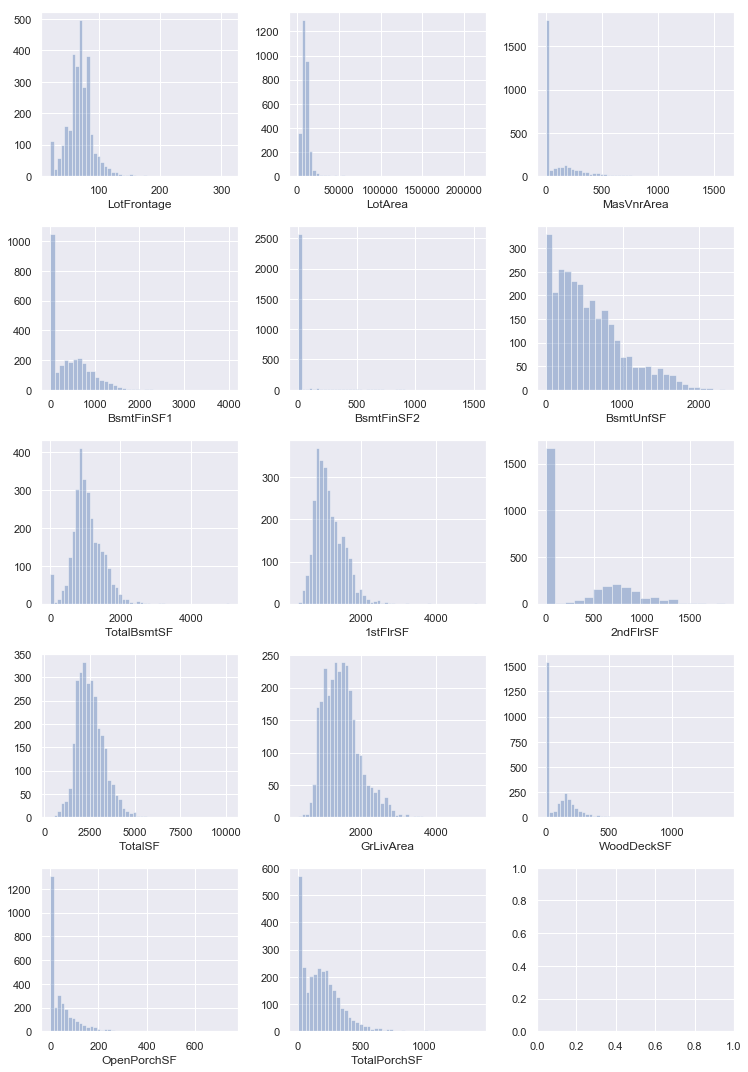

In [648]:
# Out of all of them, I decided to only transform some of the continuous explanatory
# variables.
li = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
 '2ndFlrSF','TotalSF','GrLivArea','WoodDeckSF','OpenPorchSF','TotalPorchSF']

nr_rows = 5
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols): 
        i = (r*nr_cols+c)
        if i < len(li):
            sns.distplot(cb[li[i]], kde=False, ax = axs[r][c])

plt.tight_layout()
plt.show()

In [649]:
#3rd pass we logged lotfrontage, masvnrarea 
cb['LotFrontage'] = np.log(cb['LotFrontage'])
cb['LotArea'] = np.log(cb['LotArea'])
cb['MasVnrArea'] = np.power(cb['MasVnrArea'],1/3)
cb['BsmtFinSF2'] = np.power(cb['BsmtFinSF1'],1/2)
cb['BsmtFinSF2'] = np.power(cb['BsmtFinSF2'],1/2)
cb['BsmtUnfSF'] = np.power(cb['BsmtUnfSF'],1/2)
cb['TotalBsmtSF'] = np.power(cb['TotalBsmtSF'],1/2)
cb['1stFlrSF'] = np.log(cb['1stFlrSF'])
cb['2ndFlrSF'] = np.power(cb['2ndFlrSF'],1/2)
cb['TotalSF'] = np.power(cb['TotalSF'],1/2)
cb['GrLivArea'] = np.log(cb['GrLivArea'])
cb['WoodDeckSF'] = np.power(cb['WoodDeckSF'],1/3)
cb['OpenPorchSF'] = np.power(cb['OpenPorchSF'],1/3)
cb['TotalPorchSF'] = np.power(cb['TotalPorchSF'],1/3)

#sns.distplot(np.power(cb['TotalPorchSF'],1/3),kde=True)
#sns.distplot(np.log(cb['GrLivArea']),fit=norm,kde=False)

# Label Encoding / Factorization

We'll convert nominal data into categorical data types. We decide which data is nominal by looking at the data documentation. We'll perform this process using `pd.get_dummies()`.

Next, we'll also encode ordinal data while preserving their order.

In [650]:
#Mapping nominal variables into categorical ones 
#col = ['MSSubClass', 'MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
#      'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
#      'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType',
#      'SaleType','SaleCondition','Utilities','MiscFeature','hasPool','has2ndFloor','hasGarage','hasBsmt','hasFireplace']

#Feature engineering 2 
col = ['MSSubClass', 'MSZoning','Alley','LandContour','LotConfig','Neighborhood',
      'Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd',
      'MasVnrType','Foundation','CentralAir','GarageType', 'SaleType',
      'SaleCondition','MiscFeature','hasPool','has2ndFloor','hasGarage',
      'hasBsmt','hasFireplace']


#for i in col:
#    cb[i] = pd.get_dummies(cb[i])

cb = pd.get_dummies(cb, columns=col)

Now, we look at ordinal variables and encode them into numbers is because sklearn `lm.fit()` does not accept strings when

In [651]:
#Another reason why we're encoding 
#Removed LandSlope from col1 because we removed it due to high class imbalance
col1 = ['LotShape','LandSlope','OverallCond','ExterQual','ExterCond','BsmtQual',
       'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical',
       'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
       'GarageCond','PavedDrive','PoolQC','Fence']

l = [['IR3','IR2','IR1','Reg'],['Sev','Mod','Gtl'],[1,2,3,4,5,6,7,8,9,10],['None','Po','Fa','TA','Gd','Ex'],
    ['None','Po','Fa','TA','Gd','Ex'],['None','Po','Fa','TA','Gd','Ex'],['None','Po','Fa','TA','Gd','Ex'],['None','No','Mn','Av','Gd'],
    ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    ['None','Po','Fa','TA','Gd','Ex'],['Mix','FuseP','FuseF','FuseA','SBrkr'],['None','Po','Fa','TA','Gd','Ex'],
    ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['None','Po','Fa','TA','Gd','Ex'],['None','Unf','RFn','Fin'],
    ['None','Po','Fa','TA','Gd','Ex'],['None','Po','Fa','TA','Gd','Ex'],['N','P','Y'],['None','Po','Fa','TA','Gd','Ex'],
    ['None','MnWw','GdWo','MnPrv','GdPrv']]

from pandas.api.types import CategoricalDtype
for (col,cat) in zip(col1, l):
        cat_type = CategoricalDtype(categories=cat, ordered=True)
        cb[col]=cb[col].astype(cat_type).cat.codes

In [652]:
#Check to see what is the dimension of our data set after pre-processing.
print(cb.shape)
#check to see we don't have any string or object types anymore.
print(cb.info())

(2915, 223)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Columns: 223 entries, LotFrontage to hasFireplace_1
dtypes: float64(20), int64(16), int8(21), uint8(166)
memory usage: 1.3 MB
None


Now, we'll split the dataset back to their training and test set respectively

In [654]:
x_tr = cb.iloc[:len(y),:]
x_tt = cb.iloc[len(x_tr):,:]
y_tr = y
print(x_tr.shape)
print(x_tt.shape)
x_tr.head(3)

(1456, 223)
(1459, 223)


,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF,TotalBath,TotalPorchSF,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,hasPool_0,hasPool_1,has2ndFloor_0,has2ndFloor_1,hasGarage_0,hasGarage_1,hasBsmt_0,hasBsmt_1,hasFireplace_0,hasFireplace_1
0,4.174387,9.041922,3,2,7,4,2003,2003,5.808786,4,3,4,3,1,6,706.0,1,5.154674,12.247449,29.257478,5,4,6.752270,29.223278,7.444249,1.0,0.0,2,1,3,1,4,8,6,0,0,2003.0,2,2.0,548.0,3,3,2,0.00000,3.936497,0,0,0,0,0,0,0,2,2008,50.655701,3.5,3.936497,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0

### Exploring and visualizing with the baseline model

Now, let's proceeed to fit a baseline linear regression as our benchmark and to look the diagnostic plots to make sure we meet the assumptions of fitting a linear model. But first, let's build our CV method and a model scoring function

In [655]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
#Build our model method
lm = LinearRegression()

#Build our CV method:
kfolds = KFold(n_splits=5, shuffle=True, random_state=10)

#We also have to build our model scoring function
#we put a negative sign because neg_mean_squared_error returns MSE in negative values
#so, to make it positive, we just negate it. and we square root it because we want
#the RMSE
def cv_rmse(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=kfolds,n_jobs=-1))
    return rmse

def cv_pred(model,X,y):
    return cross_val_predict(lm, X, y, cv=kfolds)

#Code to get the predcited values from cross-validation 
predicted = cross_val_predict(lm, x_tr, y_tr, cv=kfolds)

In [656]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_tr, y_tr, shuffle=True,
                                                    test_size=0.20, random_state=10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1164, 223), (292, 223), (1164,), (292,))

In [657]:
lm.fit(x_train,y_train)
ypred_tr = lm.predict(x_train)
ypred_tt = lm.predict(x_test)
print('rmse on full_train:', cv_rmse(lm,x_tr,y_tr).mean())
print('rmse on train:', cv_rmse(lm,x_train,y_train).mean())
print('rmse on test:', cv_rmse(lm,x_test,y_test).mean())

rmse on full_train: 26533.421466597425
rmse on train: 26184.07169817455
rmse on test: 64364.63163732881


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import cross_val_predict

#Build our model method
lm = LinearRegression()

#Build our CV method:
kfolds = KFold(n_splits=5, shuffle=True, random_state=10)

#We also have to build our model scoring function
#we put a negative sign because neg_mean_squared_error returns MSE in negative values
#so, to make it positive, we just negate it. and we square root it because we want
#the RMSE
def cv_rmse1(model):
    rmse = np.sqrt(-cross_val_score(model,x_tr,y_tr,scoring='neg_mean_squared_error',cv=kfolds,n_jobs=-1))
    return rmse

In [53]:
benchmark_model = lm.fit(x_tr,y_tr)

In [54]:
cv_rmse1(benchmark_model).mean()

26533.421466597425

The MSE is noticably large. The main suspect is probably due to having high dimensionality from ~250 predictor variables. We'll look at some feature selection methods later on but first, let's look at some diagnostic plots like predicted values vs residuals so that we have a better understanding of our underlying data and it's distribution

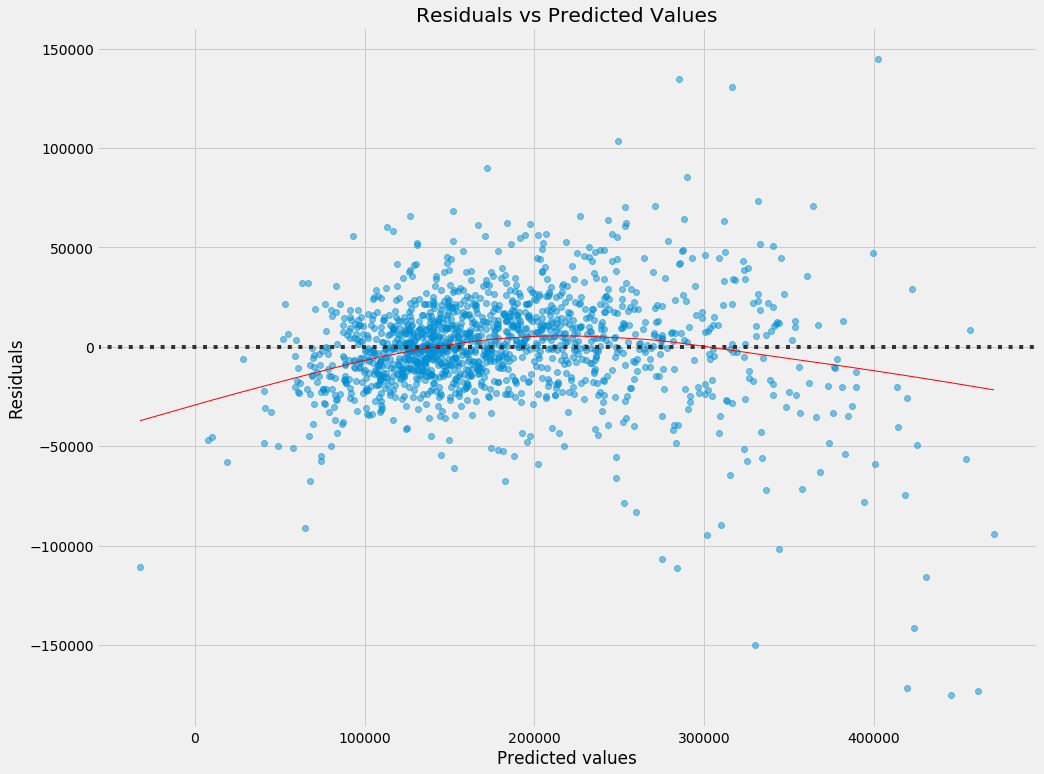

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,12))
residuals=predicted - y_tr
ax=sns.residplot(predicted,residuals,
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
ax.set_ylabel('Residuals')
ax.set_xlabel('Predicted values')
ax.set_title('Residuals vs Predicted Values')

# annotations
#abs_resid = residuals.sort_values(ascending=False)
#abs_resid_top_3 = abs_resid[:1]
#pred_sorted=sorted(predicted,reverse=True)[:1]

#for i in range(0,len(abs_resid_top_3.index)):
#    ax.annotate(abs_resid_top_3.index[i], xy=(pred_sorted[i],abs_resid_top_3.values[i]));

plt.show();

In [56]:
#We attempt to see the predicted points that are more than 400,000 on the x-axis in the
#graph above.
p = pd.Series(predicted)
print(p.sort_values(ascending=False).head(10))
# We also want to compare the y values in the training data that are more than
#400,000
y_tr.sort_values(ascending=False).head(10)

440     470556.398552
1167    461206.701621
58      456661.472810
178     454356.965253
896     445073.677802
767     430382.747064
1369    425389.008078
1044    423293.887479
823     422265.055706
349     419519.720346
dtype: float64


1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
Name: SalePrice, dtype: int64

C:\Users\MatthiasL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


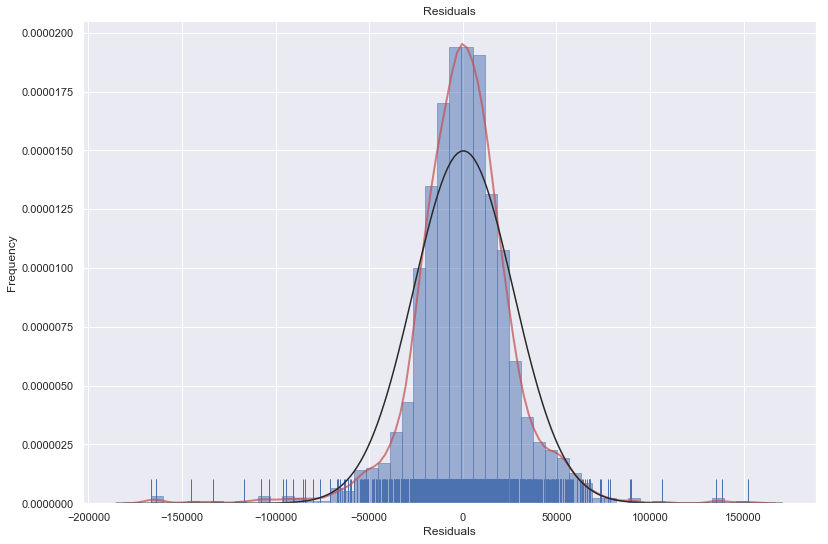

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax1 = sns.distplot(residuals,rug=True, fit=norm,
                  kde_kws={"color": "r", "lw": 2, "alpha":0.7},
                  hist_kws={"linewidth": 1, "alpha": 0.5,'edgecolor':'b'})
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Residuals')
ax1.set_title('Residuals')

plt.show()

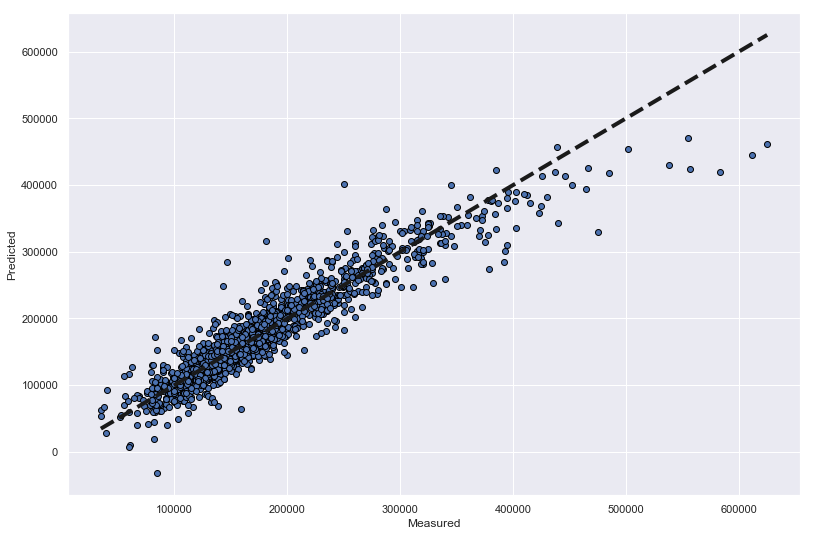

In [58]:
fig, ax = plt.subplots()
ax.scatter(y_tr, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Applying log transform to y
Our residual vs predicted value plots shows a slight downward curve, which indicates towards that our data is slightly non-linear. To fix this, we'll apply a nonlinear transformation like log transformation to the response variable (But beware when using the log transformation because we cannot have any 0 or negative values)

In [59]:
y_tr_np = np.log(y_tr)
print('rmse on full_train:', cv_rmse(lm,x_tr,y_tr_np).mean())
predicted_np = cv_pred(lm,x_tr,y_tr_np)
#1st pass: ~0.1308
#2nd pass: ~0.1285 (After dropping class with high imbalance)
#3rd pass: ~0.1234 (After transforming vars and create new variable 'TotalSF')


rmse on full_train: 0.12343661949428934


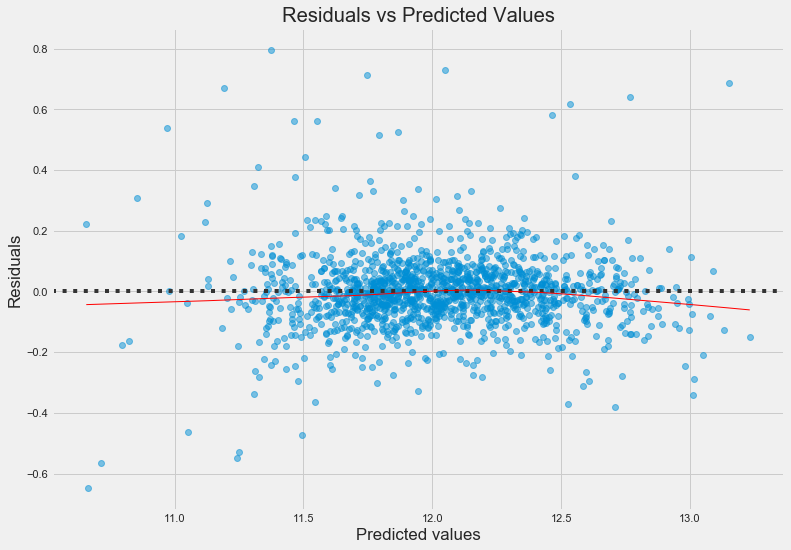

In [60]:
plt.style.use('fivethirtyeight')
residuals_np= predicted_np - y_tr_np
ax=sns.residplot(predicted_np,residuals_np,
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
ax.set_ylabel('Residuals')
ax.set_xlabel('Predicted values')
ax.set_title('Residuals vs Predicted Values')

plt.show();

Even after transforming the response variable, we can still see that the residuals vs predicted values plot still show some kind of a u-shape, providing some indication of non-linearity in the data. Hence, I will explore some non-linear regressions in the later part of this notebook. But first, we'll try to explore which of these variables have non-linear relationship with the response. Remember that one of the assumption of MLR, is that the relationship between the response and the predictor variables have an approximately linear relationship

C:\Users\MatthiasL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


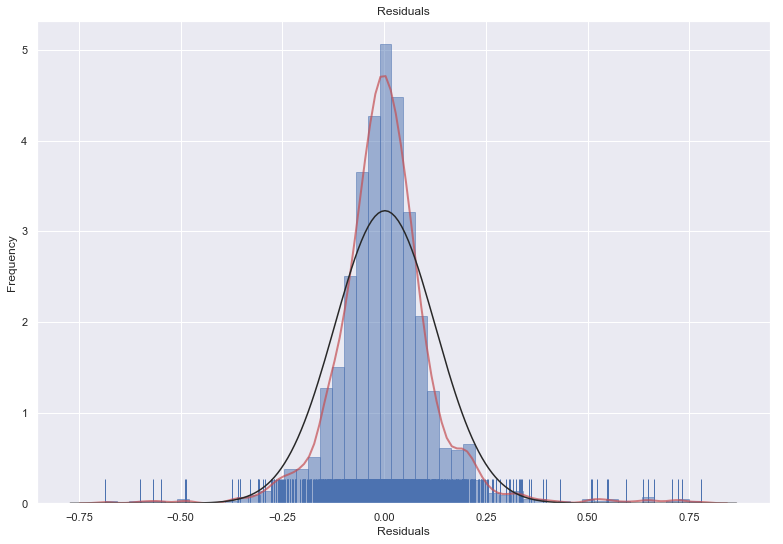

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax1 = sns.distplot(residuals_np,rug=True, fit=norm,
                  kde_kws={"color": "r", "lw": 2, "alpha":0.7},
                  hist_kws={"linewidth": 1, "alpha": 0.5,'edgecolor':'b'})
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Residuals')
ax1.set_title('Residuals')

plt.show()

## Feature Engineering 2
Our baseline model has a RMSE of ~ 0.13. Next we will explore additional ideas on how to transform our data to get a better model.
1. Drop variables with high class imbalance (DONE ABOVE BEFORE encoding categorical variables)
2. Transform right-skewed numerical variables because if an explanatory variable has a wide range covering orders of magnitude, and is skewed, then a transform such as a log or square root that condenses that range can be useful so that it might be more reasonable for the response variable to be linear in the transformed variable (e.g., square footage of the house?)
4. Variables with high collinearity? PCA..?
5. nonlinear relationships - polynomial regression

NEXT STEP:
* DO RIDGE AND LASSO REGRESSION. (How do we find optimal alpha in python). LOOK AT 2nd LAST TAB 

## RIDGE (l2 penalty)

In [162]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

scaler = RobustScaler()
X_std = scaler.fit_transform(x_tr)
alphas = [.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 
          15, 20, 30, 50, 60, 70, 80]

def ridge_selector(k,X,y):
    ridge_model = RidgeCV(alphas = [k], cv=kfolds).fit(X,y)
    ridge_rmse = cv_rmse(ridge_model,X,y).mean()
    return ridge_rmse

             RMSE
0.0001   0.123417
0.0003   0.123378
0.0005   0.123342
0.0007   0.123306
0.0009   0.123272
0.0100   0.122392
0.0500   0.121172
0.1000   0.120391
0.3000   0.118613
1.0000   0.115897
3.0000   0.113351
5.0000   0.112426
10.0000  0.111620
15.0000  0.111436
20.0000  0.111455
30.0000  0.111727
50.0000  0.112576
60.0000  0.113048
70.0000  0.113529
80.0000  0.114012
Best alpha 15.0


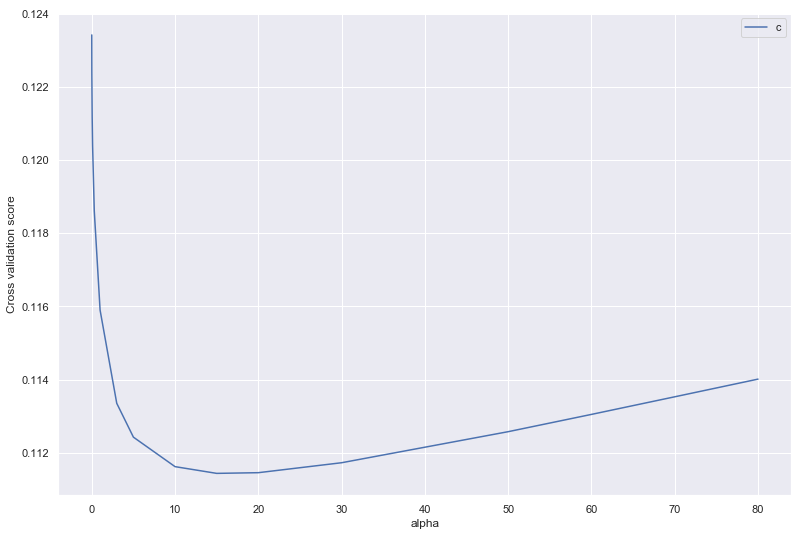

In [163]:
ridge_scores = []
for alpha in alphas:
    score = ridge_selector(alpha,X_std,y_tr_np)
    ridge_scores.append(score)

plt.plot(alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('Cross validation score')

ridge_score_table = pd.DataFrame(ridge_scores, alphas, columns=['RMSE'])
print(ridge_score_table)
print("Best alpha",ridge_score_table['RMSE'].idxmin())

Best alpha: 16.5


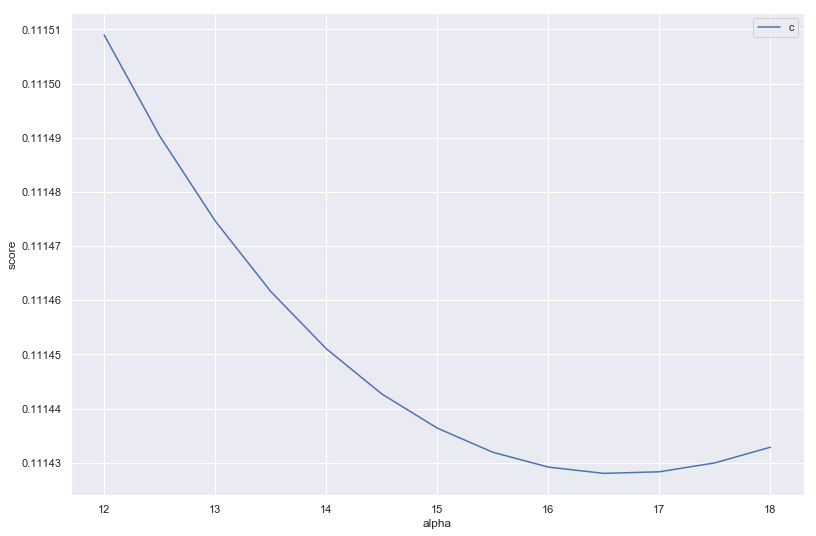

In [164]:
#We'll find the best alpha that is centered around alpha=15
alphas1 = np.arange(12,18.2,0.5)

ridge_scores = []
for alpha in alphas1:
    score = ridge_selector(alpha,X_std,y_tr_np)
    ridge_scores.append(score)

plt.plot(alphas1, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

ridge_score_table = pd.DataFrame(ridge_scores, alphas1, columns=['RMSE'])
#print(ridge_score_table)
print("Best alpha:",ridge_score_table['RMSE'].idxmin())
#Alpha values of 16,17 are pretty similar and we'll choose with 16

In [658]:
RR2=RidgeCV(alphas = alphas1, cv=kfolds).fit(X_std, y_tr_np)
print(cv_rmse(RR2,X_std,y_tr_np).mean())
print("The optimal alpha for ridge regression is:",RR2.alpha_)

0.11166883564235681
The optimal alpha for ridge regression is: 17.0


In [179]:
coeffs = pd.DataFrame(list(zip(x_tr.columns, RR2.coef_)), columns=['Predictors', 'Coefficients'])
used_coeffs = coeffs[coeffs['Coefficients'] != 0].sort_values(by='Coefficients', ascending=False)
print(used_coeffs.shape)
print(used_coeffs)

(222, 2)
                Predictors  Coefficients
4              OverallQual      0.095608
54                 TotalSF      0.087793
24               GrLivArea      0.071662
96    Neighborhood_Crawfor      0.070314
6                YearBuilt      0.061961
112   Neighborhood_StoneBr      0.056980
146    Exterior1st_BrkFace      0.049699
23                2ndFlrSF      0.044458
5              OverallCond      0.040445
74             MSZoning_FV      0.040237
117        Condition1_Norm      0.039351
93    Neighborhood_BrkSide      0.036577
22                1stFlrSF      0.035581
1                  LotArea      0.035563
106   Neighborhood_NridgHt      0.034699
33              Functional      0.033877
76             MSZoning_RL      0.032368
199           SaleType_New      0.031379
206   SaleCondition_Normal      0.030824
75             MSZoning_RH      0.027063
38              GarageCars      0.026577
219              hasBsmt_0      0.026453
86       LotConfig_CulDSac      0.026213
15     

## LASSO

In [66]:
from sklearn.linear_model import LassoCV

In [67]:
alphas2= np.logspace(-4, -1, 70)
lasso_model = LassoCV(alphas = alphas2, cv=kfolds,tol=0.00001,max_iter=1e7,random_state=42).fit(X_std,y_tr_np)

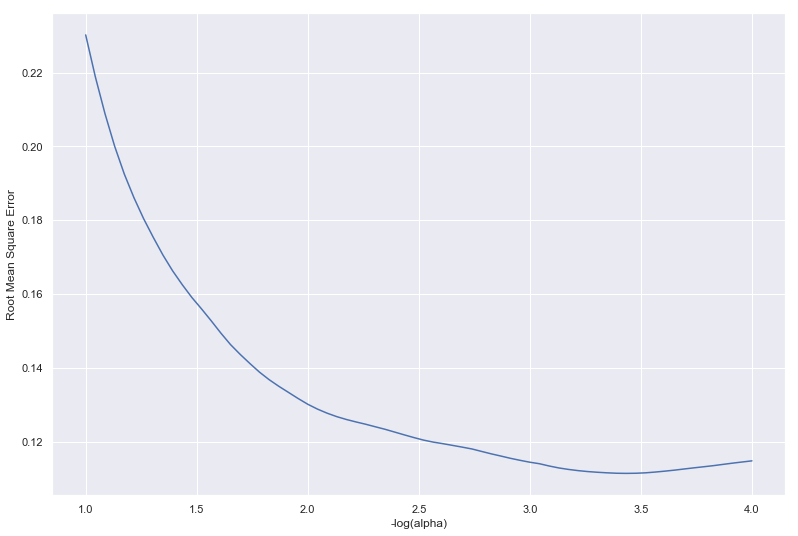

In [68]:
plt.plot(-np.log10(lasso_model.alphas_),np.sqrt(lasso_model.mse_path_.mean(axis=-1)))

plt.xlabel('-log(alpha)')
plt.ylabel('Root Mean Square Error')
plt.show()

In [69]:
print(cv_rmse(lasso_model,X_std,y_tr_np).mean())
print('Optimal alpha chosen by CV',lasso_model.alpha_)

0.11200304772122524
Optimal alpha chosen by CV 0.0003674661940736688


## ELASTIC NET

In [70]:
from sklearn.linear_model import ElasticNetCV

In [661]:
e_alphas = np.logspace(-4, 0, 50)
e_alphas

array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.17947468e-03, 6.25055193e-03, 7.54312006e-03,
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])

In [662]:
l1ratio=[.1, .5, .7, .75, .8, .85, .9, .95, .99, 1]
e_alphas = np.logspace(-4, 0, 50)

elasticnet = ElasticNetCV(alphas = e_alphas, cv=kfolds,
                          tol=0.00001,max_iter=1e7,
                          random_state=23,l1_ratio=l1ratio,n_jobs=-1).fit(X_std,y_tr_np)

print(cv_rmse(elasticnet,X_std,y_tr_np).mean())
print('Optimal l1_ratio chosen by CV',elasticnet.l1_ratio_)
print('Optimal alpha chosen by CV',elasticnet.alpha_)

0.11216903514147095
Optimal l1_ratio chosen by CV 1.0
Optimal alpha chosen by CV 0.0003727593720314938


Interestingly, our optimal l1_ratio chosen by CV is 1. As we know, when l1_ratio is 1, this is just equal to Lasso.

# XGBOOST

In [150]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb3 = XGBRegressor(learning_rate =0.05, n_estimators=223, max_depth=4,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.4,objective= 'reg:linear',
                     n_jobs=4, scale_pos_weight=1, random_state=23, reg_lambda=1)

xgb_fit = xgb3.fit(X_std, y_tr_np)
print("Xgboost model rmse : ",cv_rmse(xgb_fit,X_std,y_tr_np).mean())

Xgboost model rmse :  0.11776568098978402


# Generalized Additive Model (GAM)

In [663]:
from pygam import LinearGAM, s, f

In [667]:
gam = LinearGAM().fit(x_tr,y_tr)
gam

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + s(73) + s(74) + s(75) + s(76) + s(77) + s(78) + s(79) + s(80) + s(81) + s(82) + s(83) + s(84) + s(85) + s(86) + s(87) + s(88) + s(89) + s(90) + s(91) + s(92) + s(93) + s(94) + s(95) + s(96) + s(97) + s(98) + s(99) + s(100) + s(101) + s(102) + s(103) + s(104) + s(105) + s(106) + s(107) + s(108) + s(109) + s(110) + s(111) +

In [676]:
x_tr.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'hasPool_0', 'hasPool_1', 'has2ndFloor_0', 'has2ndFloor_1',
       'hasGarage_0', 'hasGarage_1', 'hasBsmt_0', 'hasBsmt_1',
       'hasFireplace_0', 'hasFireplace_1'],
      dtype='object', length=223)

In [677]:
XX = generate_X_grid(gam)
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(x_tr.columns))
titles = x_tr.columns
for i, ax in enumerate(axs):
    pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()


NameError: name 'generate_X_grid' is not defined